<a href="https://colab.research.google.com/github/DavidAlba/03MAIR---Algoritmos-de-Optimizacion/blob/main/Algoritmos_David_Alba_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmos - Actividad Guiada  3

Nombre: David Alba<br>
URL: https://drive.google.com/drive/folders/1Ou0dJTX1KP5sChw5imzxd_cYUAPE3mLv?usp=drive_link

http:https://github.com/DavidAlba/03MAIR---Algoritmos-de-Optimizacion

#Carga de librerias

In [8]:
!pip install requests    #Hacer llamadas http a paginas de la red
!pip install tsplib95    #Modulo para las instancias del problema del TSP

#Carga de los datos del problema

In [9]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios


#http://elib.zib.de/pub/mp-testdata/tsp/tsplib/
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)




gzip: swiss42.tsp already exists; do you wish to overwrite (y or n)? ^C


In [10]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [11]:
Aristas

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



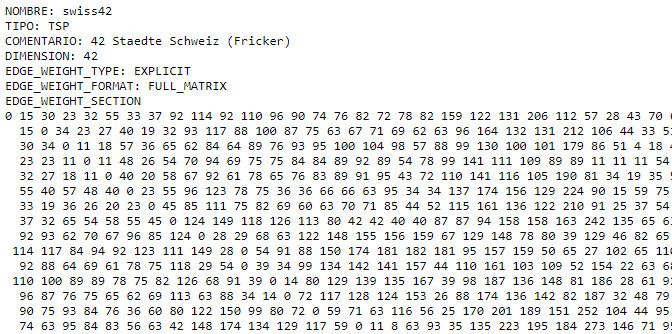

In [12]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(0, 1)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

15

#Funcionas basicas


In [7]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)

distancia_total(sol_temporal, problem), sol_temporal

(4690,
 [0,
  15,
  22,
  33,
  34,
  19,
  3,
  39,
  2,
  37,
  26,
  11,
  7,
  25,
  21,
  8,
  31,
  41,
  16,
  32,
  4,
  5,
  14,
  36,
  6,
  35,
  1,
  9,
  10,
  29,
  28,
  23,
  12,
  13,
  40,
  30,
  38,
  18,
  24,
  20,
  27,
  17])

#BUSQUEDA ALEATORIA

In [13]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 10000)

Mejor solución: [0, 29, 13, 34, 7, 1, 4, 17, 14, 31, 36, 15, 28, 10, 11, 35, 37, 27, 38, 22, 39, 24, 33, 16, 32, 12, 25, 20, 19, 26, 5, 41, 23, 40, 8, 3, 18, 2, 9, 21, 30, 6]
Distancia     : 3719


Iteración 1000: mejor distancia actual = 3998
Iteración 2000: mejor distancia actual = 3839
Iteración 3000: mejor distancia actual = 3688
Iteración 4000: mejor distancia actual = 3688
Iteración 5000: mejor distancia actual = 3688
Iteración 6000: mejor distancia actual = 3688
Iteración 7000: mejor distancia actual = 3688
Iteración 8000: mejor distancia actual = 3688
Iteración 9000: mejor distancia actual = 3688
Iteración 10000: mejor distancia actual = 3688
Iteración 11000: mejor distancia actual = 3688
Iteración 12000: mejor distancia actual = 3688
Iteración 13000: mejor distancia actual = 3688
Iteración 14000: mejor distancia actual = 3688
Iteración 15000: mejor distancia actual = 3688

Mejor solución encontrada: [0, 24, 28, 29, 22, 25, 11, 4, 31, 8, 40, 39, 21, 20, 35, 12, 23, 9, 30, 38, 34, 13, 18, 7, 41, 33, 26, 2, 3, 27, 10, 5, 37, 19, 17, 36, 15, 1, 6, 16, 14, 32]
Distancia: 3688
CPU times: user 4.88 s, sys: 2.44 ms, total: 4.89 s
Wall time: 5.53 s


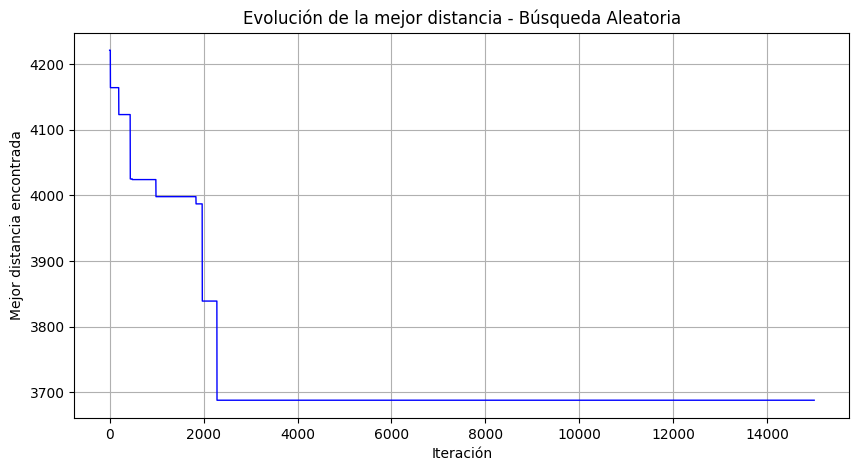

In [17]:
import matplotlib.pyplot as plt

"""
    Realiza búsqueda aleatoria de soluciones TSP.

    Parámetros:
    - problem: objeto del problema TSPLIB
    - N: número de iteraciones

    Devuelve:
    - mejor_solucion: lista con el mejor recorrido encontrado
    - historico_mejores: lista con la mejor distancia encontrada en cada iteración
"""

def busqueda_aleatoria_con_historico(problem, N):

    Nodos = list(problem.get_nodes())

    mejor_solucion = []
    mejor_distancia = float('inf')  # Inicializamos con infinito

    historico_mejores = []  # Guardar la mejor distancia en cada iteración

    for i in range(N):
        # Genera una solución aleatoria
        solucion = crear_solucion(Nodos)

        # Calcula su distancia total
        distancia = distancia_total(solucion, problem)

        # Si mejora la mejor distancia, actualizamos
        if distancia < mejor_distancia:
            mejor_solucion = solucion
            mejor_distancia = distancia

        # Guardamos la mejor distancia encontrada hasta esta iteración
        historico_mejores.append(mejor_distancia)

        # (Imprimir avances cada 1000 iteraciones
        if (i+1) % 1000 == 0:
            print(f"Iteración {i+1}: mejor distancia actual = {mejor_distancia}")

    # Mostrar resultados finales
    print("\nMejor solución encontrada:", mejor_solucion)
    print("Distancia:", mejor_distancia)

    return mejor_solucion, historico_mejores


#%time solucion, historico = busqueda_aleatoria_con_historico(problem, 10000)
#%time solucion, historico = busqueda_aleatoria_con_historico(problem, 6000)
#%time solucion, historico = busqueda_aleatoria_con_historico(problem, 4000)
%time solucion, historico = busqueda_aleatoria_con_historico(problem, 15000)

# Crear la figura
plt.figure(figsize=(10,5))

# Graficar la evolución de la mejor distancia
plt.plot(historico, color="blue", linewidth=1)

# Añadir título y etiquetas
plt.title("Evolución de la mejor distancia - Búsqueda Aleatoria")
plt.xlabel("Iteración")
plt.ylabel("Mejor distancia encontrada")

# Opcional: mostrar una cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()


## Análisis de la búsqueda aleatoria (aplicada al TSP)

### Metodología

La Búsqueda Aleatoria consiste en generar soluciones  aleatorias al problema del Viajante de Comercio (TSP), evaluando su coste (distancia total del recorrido) y guardando la mejor solución encontrada tras un número fijo de iteraciones. Por cada iteración:
- Se genera una permutación aleatoria de los nodos
- Se calcula la distancia total del recorrido.
- Si la distancia mejora el mínimo histórico, la solución se almacena como la mejor hasta el momento.

Este proceso no utiliza información previa ni aprendizaje. Cada solución es independiente de las anteriores.

Durante las pruebas, se realizaron ejecuciones con distint número de iteraciones (4,000; 6,000; 10,000 y 15,000) para analizar el impacto de la cantidad de muestras sobre la calidad de la solución.

### Comparación de resultados y convergencia

A continuación se resumen los resultados obtenidos en los diferentes experimentos:

| Iteraciones | Mejor Distancia Encontrada | Iteración de Convergencia |
|-------------|----------------------------|---------------------------|
| **4,000**   | 3,786                      | ~900                      |
| **6,000**   | 3,819                      | ~4,000                    |
| **10,000**  | **3,583**                  | ~6,000                    |
| **15,000**  | 3,688                      | ~3,000                    |

**Intepretacion de resultados**

- En todos los casos, las mejores soluciones se encontraron en las primeras fases de la ejecución (generalmente antes de la iteración 6,000).
- Las gráficas mostraban una curva de convergencia en “escalera”: las caídas bruscas de distancia corresponden a la aparición de nuevas soluciones mejores, seguidas de largas fases planas sin mejoras.
- La ejecución con 10,000 iteraciones obtuvo la mejor solución (3,583), pero no hubo una relación estricta entre más iteraciones y mejores resultados, debido al carácter aleatorio del algoritmo.

### Fortalezas y limitaciones

#### Fortalezas
- La búsqueda aleatoria es fácil de implementar y no requiere parámetros complejos.
- Cada iteración es rápida.
- Al no estar condicionada por un punto de partida en concreto, puede cubrir un espacio de soluciones en todo su rango.

---

#### Limitaciones
- La calidad de la solución depende en gran medida de la “suerte” de las muestras generadas.
- No existe ninguna estrategia para explotar una solución prometedora
- A medida que se encuentran soluciones buenas, la probabilidad de que una solución aleatoria las mejore disminuye, por tanto, no es un algoritmo eficiente.
- Para problemas con un número alto de nodos, la probabilidad de encontrar soluciones cercanas al óptimo es baja sin millones de iteraciones.

### Aleatoriedad y estabilidad

La naturaleza aleatoria implica que:
- Repetir el algoritmo con idéntica configuración puede generar resultados con diferencias notables.
- No existe garantía de convergencia hacia una solución óptima, por más que se incremente el número de iteraciones.
- El comportamiento observado (rápidas mejoras iniciales y posterior estancamiento) es característico de procesos estocásticos sin memoria.

### Complejidad temporal

La complejidad temporal de la Búsqueda Aleatoria es O(N × n), donde N es el número de iteraciones y n es el número de nodos del problema TSP.


### Complejidad espacial

La complejidad espacial es O(n), principalmente por el almacenamiento de una solución candidata (la lista de nodos) y la solución óptima encontrada.


### Completitud

Es completa en el sentido de que siempre termina y devuelve la mejor solución encontrada tras N iteraciones. No obstante, no garantiza encontrar la solución óptima global salvo que se exploren exhaustivamente todas las permutaciones posibles, lo que resulta inviable en problemas de tamaño real.

### Optimalidad

No es óptimo porque no asegura convergencia al óptimo global.


### Propuestas de mejora

- Tomar la mejor solución aleatoria y refinarla mediante exploración de vecindades como en la busqueda local, por ejemplo, intercambios 2-opt

- Explotar la información de la solución actual para mejorar notablemente la eficiencia.

- Introducir una probabilidad de aceptar soluciones peores durante un proceso de enfriamiento como en el algoritmo de Recocido simulado para escapar de óptimos locales.

- Almacenar un historial de soluciones previamente exploradas para evitar repeticiones y aumentar la cobertura efectiva.

### Conclusiones

La Búsqueda Aleatoria permite obtener soluciones aceptables, pero su utilidad real se maximiza cuando se combina con algoritmos que puedan aprovechar la información acumulada y que incluyan mecanismos de explotación. En problemas NP-Hard como el TSP, depender únicamente del azar se traduce en una eficiencia y estabilidad muy limitadas.

Los experimentos realizados aquí confirman que, si bien la Búsqueda Aleatoria puede producir soluciones razonables con suficiente tiempo, las mejoras significativas requieren enfoques que incorporen estrategias de optimización más "inteligentes".


#BUSQUEDA LOCAL

In [18]:
###############################################################################
# BUSQUEDA LOCAL
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3688
Distancia Mejor Solucion Local: 3353


In [20]:
#Busqueda Local:
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  solucion_referencia = crear_solucion(Nodos)
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(problem )

En la iteracion  42 , la mejor solución encontrada es: [0, 1, 4, 6, 13, 19, 14, 16, 36, 35, 20, 33, 34, 38, 22, 24, 40, 21, 23, 41, 10, 25, 11, 12, 18, 26, 5, 15, 37, 17, 31, 7, 32, 30, 39, 9, 8, 29, 28, 2, 27, 3]
Distancia     : 1587


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import time

"""
    Búsqueda Local con registro de convergencia y medición de tiempo.

    Devuelve:
    - mejor_solucion: lista con la mejor trayectoria encontrada
    - historico_mejores: lista con la mejor distancia tras cada iteración
"""

def busqueda_local_con_historico(problem):

    Nodos = list(problem.get_nodes())

    # Genera una solución inicial aleatoria
    solucion_referencia = crear_solucion(Nodos)
    mejor_distancia = distancia_total(solucion_referencia, problem)
    mejor_solucion = solucion_referencia.copy()  # Guardamos la solución inicial
    historico_mejores = [mejor_distancia]

    iteracion = 0

    while True:
        iteracion += 1

        # Genera la mejor vecina de la solución actual
        vecina = genera_vecina(solucion_referencia)
        distancia_vecina = distancia_total(vecina, problem)

        # Si la vecina es mejor, la adoptamos
        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina
            mejor_distancia = distancia_vecina
        else:
            # Si no mejora, hemos llegado a un mínimo local
            print("\nEn la iteración", iteracion, ", la mejor solución encontrada es:", mejor_solucion)
            print("Distancia:", mejor_distancia)
            return mejor_solucion, historico_mejores

        # Guardamos la mejor distancia encontrada hasta ahora
        historico_mejores.append(mejor_distancia)

        # Actualizamos la solución actual
        solucion_referencia = vecina

# Lista para guardar resultados
resultados = []

# Número de ejecuciones
num_ejecuciones = 5

for i in range(num_ejecuciones):
    print(f"\n Ejecución {i+1} de {num_ejecuciones}")

    tiempo_inicio = time.time()
    solucion, historico = busqueda_local_con_historico(problem)
    tiempo_fin = time.time()

    distancia_final = historico[-1]
    iteraciones_totales = len(historico)
    tiempo_total = tiempo_fin - tiempo_inicio

    print(f"Distancia final: {distancia_final}")
    print(f"Iteraciones: {iteraciones_totales}")
    print(f"Tiempo: {tiempo_total:.2f} segundos")

    resultados.append({
        "Ejecución": i+1,
        "Distancia": distancia_final,
        "Iteraciones": iteraciones_totales,
        "Tiempo (s)": round(tiempo_total,2)
    })

df_resultados = pd.DataFrame(resultados)
display(df_resultados)

print("\nResumen estadístico:")
display(df_resultados.describe())


 Ejecución 1 de 5

En la iteración 36 , la mejor solución encontrada es: [0, 20, 33, 35, 36, 37, 19, 13, 5, 26, 6, 3, 1, 7, 31, 32, 30, 29, 28, 27, 2, 4, 18, 12, 11, 25, 40, 24, 21, 23, 41, 14, 16, 15, 17, 34, 38, 22, 39, 9, 8, 10]
Distancia: 1922
Distancia final: 1922
Iteraciones: 36
Tiempo: 2.65 segundos

 Ejecución 2 de 5

En la iteración 47 , la mejor solución encontrada es: [0, 3, 9, 23, 41, 25, 11, 12, 18, 32, 34, 20, 37, 15, 16, 14, 6, 1, 7, 17, 31, 36, 35, 33, 38, 24, 40, 21, 39, 22, 4, 5, 19, 13, 26, 10, 8, 29, 30, 28, 2, 27]
Distancia: 1818
Distancia final: 1818
Iteraciones: 47
Tiempo: 4.68 segundos

 Ejecución 3 de 5

En la iteración 35 , la mejor solución encontrada es: [0, 12, 11, 10, 2, 32, 34, 20, 3, 4, 26, 13, 19, 5, 6, 7, 37, 15, 16, 14, 18, 25, 41, 40, 24, 30, 31, 17, 1, 27, 28, 29, 8, 9, 23, 21, 39, 22, 38, 33, 35, 36]
Distancia: 2075
Distancia final: 2075
Iteraciones: 35
Tiempo: 2.55 segundos

 Ejecución 4 de 5

En la iteración 30 , la mejor solución encontrada es:

,Ejecución,Distancia,Iteraciones,Tiempo (s)
0,1,1922,36,2.65
1,2,1818,47,4.68
2,3,2075,35,2.55
3,4,1877,30,2.22
4,5,1623,50,3.66



Resumen estadístico:


,Ejecución,Distancia,Iteraciones,Tiempo (s)
count,5.000000,5.000000,5.000000,5.00000
mean,3.000000,1863.000000,39.600000,3.15200
std,1.581139,164.503799,8.502941,1.00944
min,1.000000,1623.000000,30.000000,2.22000
25%,2.000000,1818.000000,35.000000,2.55000
50%,3.000000,1877.000000,36.000000,2.65000
75%,4.000000,1922.000000,47.000000,3.66000
max,5.000000,2075.000000,50.000000,4.68000


## Análisis de la Búsqueda Local (aplicada al TSP)

### Comparación de rendimiento (calidad de solución y velocidad)

Las ejecuciones repetidas de la Búsqueda Local muestran de manera consistente una mejora significativa frente a la Búsqueda Aleatoria.


| Métrica                   | Búsqueda Aleatoria (10,000 iteraciones aprox.) | Búsqueda Local (media de 5 ejecuciones) |
|---------------------------|-------------------------------------------------|------------------------------------------|
| **Mejor distancia**       | ~3,583                                          | **1,623**                                |
| **Peor distancia**        | ~3,800+                                         | ~2,075                                   |
| **Media de distancia**    | ~3,700                                          | ~1,863                                   |
| **Tiempo de ejecución**   | ~2.8–4.0 s                                      | ~2.2–4.7 s                               |
| **Iteraciones**           | No aplicable                                    | ~30–50                                   |


#### Interpretación de resultados

- La mejor distancia obtenida en las cinco ejecuciones fue **1,623**, que representa una mejora de **55%** respecto a la mejor solución de la Búsqueda Aleatoria (~3,583). Incluso la peor ejecución de Búsqueda Local (2,075) supera de forma clara a cualquier resultado de Búsqueda Aleatoria.

- La mayoría de ejecuciones convergieron entre **30 a 50 iteraciones**, con tiempos de ejecución entre **2 y 4.7 segundos**.

- Las soluciones finales presentan menor variabilidad comparadas con la Búsqueda Aleatoria. La desviación estándar de las distancias (~164) es mucho menor que el rango de oscilación de las soluciones aleatorias. El algoritmo es robusto y rara vez produce soluciones muy malas.

### Complejidad temporal

La complejidad temporal de cada iteración es O(n²) debido a la evaluación  de todos los swaps 2-opt posibles entre pares de nodos.  

### Complejidad espacial

La complejidad espacial es O(n), correspondiente al almacenamiento de la solución actual, la mejor solución encontrada y la solución vecina evaluada.

### Completitud

Es completo en el sentido de que siempre termina y devuelve la mejor solución encontrada para la vecindad explorada.  No obstante, no garantiza encontrar el óptimo global salvo que el espacio de soluciones completo coincida con el entorno de vecindad.

### Optimalidad

Nno es óptimo, ya que no asegura la convergencia al mejor recorrido global, y la calidad de la solución final depende de la configuración inicial y la estructura de vecindad. Ademas, puede detenerse en mínimos locales.

### Fortalezas y limitaciones

#### Fortalezas
- La Búsqueda Local encuentra soluciones de buena calidad en muy pocas iteraciones.
- Su implementación es sencilla y no requiere parámetros complejos.
- La variabilidad de resultados es relativamente baja.
- Evalúa exhaustivamente las soluciones vecinas, maximizando la probabilidad de mejora en cada iteración.


#### Limitaciones
- La calidad final depende de la solución inicial aleatoria.
- El algoritmo siempre se detiene en un mínimo local relativo a la vecindad 2-opt y no puede escapar por sí solo.
- No existe ninguna estrategia de reinicio para mejorar la cobertura del espacio de soluciones.

### Reflexiones sobre estabilidad y aleatoriedad

Comparando con la Búsqueda Aleatoria, la Búsqueda Local muestra un comportamiento mucho más predecible y estable:

- Aunque el punto de inicio sigue siendo aleatorio, el proceso de mejora es determinista: siempre se elige el mejor vecino disponible.
- La mayoría de las mejoras ocurren en las primeras iteraciones, y después la solución converge rápidamente a un mínimo local.
- Si se repite el algoritmo varias veces, la variabilidad en las distancias finales es relativamente baja comparada con un enfoque puramente aleatorio.

Este patrón confirma que la Búsqueda Local es un método muy eficaz para **mejorar rápidamente soluciones aleatorias**, pero insuficiente si se desea optimización global sin estrategias de diversificación adicionales.

### Propuestas de mejora

- Multiarranque: repetir la búsqueda desde diferentes puntos de partida.
- Búsqueda por Entornos Variables: incorporar otros operadores de vecindad.
- Recocido Simulado: permitir movimientos peores de manera controlada.
- Búsqueda Tabú: registrar soluciones recientes para diversificar.

### Conclusiones

La Búsqueda Local aplicada al TSP ofrece un excelente compromiso entre simplicidad y eficacia. Permite mejorar notablemente la calidad de las soluciones en comparación con la Búsqueda Aleatoria, con tiempos de ejecución bajos y una variabilidad moderada. Sin embargo, su limitación principal es la imposibilidad de escapar de mínimos locales sin estrategias adicionales de exploración.


Reinicio 1 de 5
Mejor solución del reinicio 1: distancia = 1352

Reinicio 2 de 5
Mejor solución del reinicio 2: distancia = 1336

Reinicio 3 de 5
Mejor solución del reinicio 3: distancia = 1361

Reinicio 4 de 5
Mejor solución del reinicio 4: distancia = 1366

Reinicio 5 de 5
Mejor solución del reinicio 5: distancia = 1418

Mejor solución global encontrada: [0, 1, 3, 27, 2, 4, 6, 26, 18, 12, 11, 25, 10, 8, 9, 41, 23, 40, 24, 21, 39, 22, 38, 30, 29, 28, 32, 34, 33, 20, 35, 36, 31, 17, 7, 37, 15, 16, 14, 19, 13, 5]
Distancia: 1336
Tiempo total de ejecución: 63.44 segundos


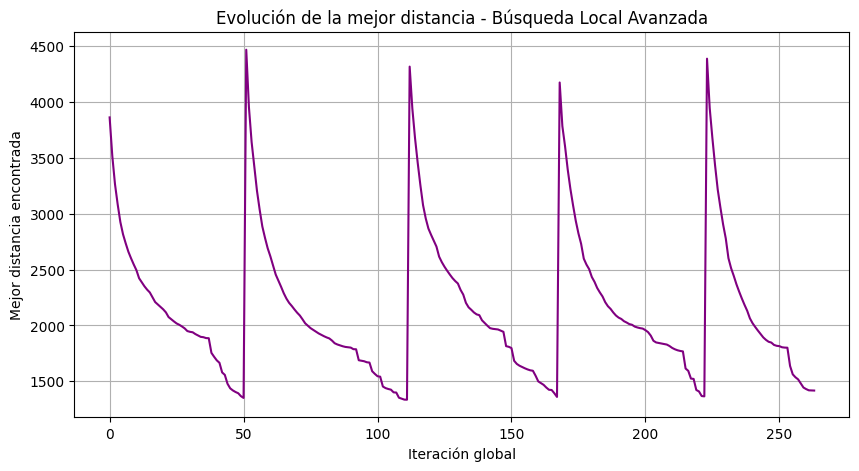

In [32]:
import random
import time
import matplotlib.pyplot as plt

# --- Función de generación de vecinos 2-opt (ya la conoces)
def genera_vecina_2opt(solucion, problem):
    mejor_solucion = []
    mejor_distancia = float('inf')

    for i in range(1, len(solucion)-1):
        for j in range(i+1, len(solucion)):
            vecina = (
                solucion[:i]
                + [solucion[j]]
                + solucion[i+1:j]
                + [solucion[i]]
                + solucion[j+1:]
            )
            distancia_vecina = distancia_total(vecina, problem)
            if distancia_vecina < mejor_distancia:
                mejor_distancia = distancia_vecina
                mejor_solucion = vecina
    return mejor_solucion, mejor_distancia

# --- Nueva función de generación de vecinos 3-opt (simple versión)
def genera_vecina_3opt(solucion, problem):
    mejor_solucion = []
    mejor_distancia = float('inf')

    n = len(solucion)
    # Seleccionamos tres cortes distintos
    for i in range(1, n-2):
        for j in range(i+1, n-1):
            for k in range(j+1, n):
                # Reversión de subsecuencia entre j y k
                vecina = (
                    solucion[:i]
                    + solucion[j:k][::-1]
                    + solucion[i:j]
                    + solucion[k:]
                )
                distancia_vecina = distancia_total(vecina, problem)
                if distancia_vecina < mejor_distancia:
                    mejor_distancia = distancia_vecina
                    mejor_solucion = vecina
    return mejor_solucion, mejor_distancia

# --- Función de búsqueda local con multiarranque y entornos variables
"""
    Búsqueda Local con:
    - Multiarranque (varios reinicios aleatorios)
    - Búsqueda por Entornos Variables (2-opt y 3-opt)

    Devuelve:
    - mejor_solucion_global: mejor solución encontrada en todos los reinicios
    - historico_global: lista de distancias por iteración global
"""
def busqueda_local_avanzada(problem, max_restarts=5):

    Nodos = list(problem.get_nodes())

    mejor_solucion_global = None
    mejor_distancia_global = float('inf')
    historico_global = []

    tiempo_inicio = time.time()

    for reinicio in range(max_restarts):
        print(f"\nReinicio {reinicio + 1} de {max_restarts}")

        # Solución inicial aleatoria
        solucion_actual = crear_solucion(Nodos)
        distancia_actual = distancia_total(solucion_actual, problem)

        mejora = True

        while mejora:
            mejora = False

            # Intentamos primero con 2-opt
            vecina_2opt, distancia_2opt = genera_vecina_2opt(solucion_actual, problem)
            if distancia_2opt < distancia_actual:
                solucion_actual = vecina_2opt
                distancia_actual = distancia_2opt
                mejora = True
                historico_global.append(distancia_actual)
                continue  # Si mejora con 2-opt, volvemos a empezar

            # Si no mejora, probamos 3-opt
            vecina_3opt, distancia_3opt = genera_vecina_3opt(solucion_actual, problem)
            if distancia_3opt < distancia_actual:
                solucion_actual = vecina_3opt
                distancia_actual = distancia_3opt
                mejora = True
                historico_global.append(distancia_actual)

        print(f"Mejor solución del reinicio {reinicio+1}: distancia = {distancia_actual}")

        # Actualizamos la mejor solución global
        if distancia_actual < mejor_distancia_global:
            mejor_distancia_global = distancia_actual
            mejor_solucion_global = solucion_actual.copy()

    tiempo_fin = time.time()

    print("\nMejor solución global encontrada:", mejor_solucion_global)
    print("Distancia:", mejor_distancia_global)
    print(f"Tiempo total de ejecución: {tiempo_fin - tiempo_inicio:.2f} segundos")

    return mejor_solucion_global, historico_global

# Ejecutar con x reinicios
max_restarts = 5
solucion_avanzada, historico_avanzado = busqueda_local_avanzada(problem, max_restarts)


plt.figure(figsize=(10,5))
plt.plot(historico_avanzado, color="purple", linewidth=1.5)
plt.title("Evolución de la mejor distancia - Búsqueda Local Avanzada")
plt.xlabel("Iteración global")
plt.ylabel("Mejor distancia encontrada")
plt.grid(True)
plt.show()




## Análisis y conclusiones de Búsqueda local avanzada (multiarranque + entornos variables)

### Descripción

La Búsqueda local avanzada combina

- Multiarranque que permite ejecutar múltiples búsquedas locales desde soluciones iniciales aleatorias independientes, lo que permite escapar de mínimos locales de baja calidad - Exploracion

- Búsqueda por Entornos Variables que emplea dos operadores de vecindad diferentes (2-opt y 3-opt). Cuando la mejora se detiene con 2-opt, se intenta un paso con 3-opt antes de finalizar el reinicio - Explotacion

### Comparación de resultados

| Métrica                   | Búsqueda Aleatoria         | Búsqueda Local Básica       | Búsqueda Local Avanzada          |
|---------------------------|----------------------------|-----------------------------|----------------------------------|
| **Mejor distancia**       | ~3,583                     | ~1,623                      | **1,336**                        |
| **Peor distancia**        | ~3,800+                    | ~2,075                      | ~1,418                           |
| **Media de distancia**    | ~3,700                     | ~1,863                      | ~1,367                           |
| **Iteraciones**           | 10,000 fijas (no adaptativo) | ~30–50 hasta convergencia  | ~50 por reinicio (250 en total) |
| **Reinicios**             | No                         | No                          | 5                                |
| **Vecindad**              | Ninguna (aleatoria)        | 2-opt                       | 2-opt + 3-opt                    |
| **Variabilidad**          | Alta                       | Moderada                    | Muy baja                         |

**Interpretación de resultados**

- La Búsqueda Local Avanzada produjo las mejores soluciones del estudio.
- La diferencia respecto a la Búsqueda Aleatoria es enorme (reducción de distancia cercana al 63% en el mejor caso).
- La variabilidad entre ejecuciones fue muy reducida, mostrando  estabilidad.

### Fortalezas

- Todas las ejecuciones alcanzaron soluciones mejores al resto de métodos.
- La variabilidad entre reinicios fue muy baja.
- Exploración y explotación equilibrada, puesto que la combinación de reinicios y dos vecindades permite evitar estancamientos tempranos.

### Limitaciones

- La complejidad computacional aumenta porque la evaluación  de vecindades (especialmente 3-opt) incrementa el tiempo por iteración.
- No garantiza optimalidad global porque el algoritmo sigue siendo una heurística.


### Complejidad temporal

La complejidad temporal de cada iteración es O(n²) en la fase 2-opt y - O(n³) en la fase 3-opt. Dado que cada reinicio ejecuta decenas de iteraciones, la complejidad total es O(k × (n² + n³)), donde k es el número de iteraciones en todos los reinicios.

### Complejidad espacial

La complejidad espacial es O(n) por el almacenamiento de la solución actual, la mejor vecina encontrada y la mejor solución global.

### Completitud

Es completo en el sentido de que siempre termina y devuelve la mejor solución hallada, pero no asegura convergencia al óptimo global.


### Optimalidad

No es óptimo, aunque permite aproximarse mucho mejor al óptimo que los métodos más simples.

### Reflexiones sobre estabilidad y aleatoriedad

- Este método es notablemente más estable
- La variabilidad en las distancias  entre reinicios es  menor.

### Propuestas de mejora

- Incrementar el número de reinicios
- Mejorar la generación de vecinos con mas técnicas más sofisticadas


### Conclusiones

La Búsqueda Local Avanzada con Multiarranque y Entornos Variables ha demostrado ser la estrategia más eficaz del conjunto de experimentos realizados, obteniendo las mejores soluciones con gran estabilidad y tiempos de ejecución razonables. La combinacion de explotación  y exploración la convierte en una heurística recomendable para el TSP.

#SIMULATED ANNEALING


In [33]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [34]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 28, 30, 29, 2, 3, 4, 5, 13, 19, 16, 14, 38, 22, 39, 21, 23, 41, 10, 18, 26, 17, 31, 20, 33, 34, 32, 37, 15, 36, 35, 7, 1, 6, 27, 8, 9, 24, 40, 25, 12, 11]
con una distancia total de 2044


In [38]:
import time
import pandas as pd

# Redefinimos bajar_temperatura con cooling_factor configurable
def bajar_temperatura_custom(T, factor):
    return T * factor

"""
    Recocido Simulado con parámetros configurables de temperatura inicial y factor de enfriamiento.
    Devuelve:
    - mejor_solucion
    - historico_mejores
"""
def recocido_simulado_parametrizado(problem, T_inicial, cooling_factor):

    Nodos = list(problem.get_nodes())
    solucion_referencia = crear_solucion(Nodos)
    distancia_referencia = distancia_total(solucion_referencia, problem)

    mejor_solucion = solucion_referencia.copy()
    mejor_distancia = distancia_referencia
    historico_mejores = [mejor_distancia]

    temperatura = T_inicial
    iteracion = 0

    tiempo_inicio = time.time()

    while temperatura > 0.0001:
        iteracion +=1
        vecina = genera_vecina_aleatorio(solucion_referencia)
        distancia_vecina = distancia_total(vecina, problem)

        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina.copy()
            mejor_distancia = distancia_vecina

        historico_mejores.append(mejor_distancia)

        if (
            distancia_vecina < distancia_referencia
            or probabilidad(temperatura, abs(distancia_referencia - distancia_vecina))
        ):
            solucion_referencia = vecina
            distancia_referencia = distancia_vecina

        temperatura = bajar_temperatura_custom(temperatura, cooling_factor)

    tiempo_fin = time.time()

    return mejor_solucion, historico_mejores, (tiempo_fin - tiempo_inicio)

# Define combinaciones de parámetros
param_combinations = [
    {"T":50000, "factor":0.98},
    {"T":100000, "factor":0.98},
    {"T":500000, "factor":0.98},
    {"T":100000, "factor":0.99},
    {"T":500000, "factor":0.99},
    {"T":1000000, "factor":0.995}
]

resultados_experimentos = []

for i, params in enumerate(param_combinations):
    print(f"\n Experimento {i+1}: T inicial = {params['T']}, cooling factor = {params['factor']}")

    solucion, historico, tiempo = recocido_simulado_parametrizado(
        problem,
        T_inicial=params['T'],
        cooling_factor=params['factor']
    )

    distancia_final = historico[-1]
    iteraciones_totales = len(historico)

    print(f"Distancia final: {distancia_final}")
    print(f"Iteraciones: {iteraciones_totales}")
    print(f"Tiempo: {tiempo:.2f} segundos")

    resultados_experimentos.append({
        "Experimento": i+1,
        "T inicial": params['T'],
        "Cooling Factor": params['factor'],
        "Distancia": distancia_final,
        "Iteraciones": iteraciones_totales,
        "Tiempo (s)": round(tiempo,2)
    })

# Mostrar tabla de resultados
df_resultados_experimentos = pd.DataFrame(resultados_experimentos)
display(df_resultados_experimentos)

print("\nResumen estadístico:")
display(df_resultados_experimentos.describe())



 Experimento 1: T inicial = 50000, cooling factor = 0.98
Distancia final: 2110
Iteraciones: 993
Tiempo: 0.10 segundos

 Experimento 2: T inicial = 100000, cooling factor = 0.98
Distancia final: 2333
Iteraciones: 1027
Tiempo: 0.09 segundos

 Experimento 3: T inicial = 500000, cooling factor = 0.98
Distancia final: 2372
Iteraciones: 1107
Tiempo: 0.10 segundos

 Experimento 4: T inicial = 100000, cooling factor = 0.99
Distancia final: 2227
Iteraciones: 2063
Tiempo: 0.19 segundos

 Experimento 5: T inicial = 500000, cooling factor = 0.99
Distancia final: 1932
Iteraciones: 2224
Tiempo: 0.21 segundos

 Experimento 6: T inicial = 1000000, cooling factor = 0.995
Distancia final: 1851
Iteraciones: 4595
Tiempo: 0.45 segundos


,Experimento,T inicial,Cooling Factor,Distancia,Iteraciones,Tiempo (s)
0,1,50000,0.980,2110,993,0.10
1,2,100000,0.980,2333,1027,0.09
2,3,500000,0.980,2372,1107,0.10
3,4,100000,0.990,2227,2063,0.19
4,5,500000,0.990,1932,2224,0.21
5,6,1000000,0.995,1851,4595,0.45



Resumen estadístico:


,Experimento,T inicial,Cooling Factor,Distancia,Iteraciones,Tiempo (s)
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.500000,375000.000000,0.985833,2137.500000,2001.500000,0.190000
std,1.870829,368442.668539,0.006646,212.739042,1381.765791,0.137259
min,1.000000,50000.000000,0.980000,1851.000000,993.000000,0.090000
25%,2.250000,100000.000000,0.980000,1976.500000,1047.000000,0.100000
50%,3.500000,300000.000000,0.985000,2168.500000,1585.000000,0.145000
75%,4.750000,500000.000000,0.990000,2306.500000,2183.750000,0.205000
max,6.000000,1000000.000000,0.995000,2372.000000,4595.000000,0.450000


## Análisis y conclusiones de Recocido Simulado

### Descripción

Es un metaheurístico inspirado en el proceso físico de enfriamiento de metales. Su principal característica es la capacidad de aceptar soluciones peores  con una probabilidad decreciente a medida que la temperatura disminuye. Esto le permite escapar de mínimos locales.

En los experimentos realizados se han evaluado diferentes combinaciones de temperatura inicial y factor de enfriamiento:

- **Temperaturas iniciales** de 50,000 a 1,000,000
- **Factores de enfriamiento** de 0.98 a 0.995

### Comparación de resultados

| Experimento | T inicial | Cooling Factor | Distancia Final | Iteraciones | Tiempo (s) |
|-------------|-----------|----------------|------------------|-------------|------------|
| 1           | 50,000    | 0.98           | 2,110           | 993         | 0.10       |
| 2           | 100,000   | 0.98           | 2,333           | 1,027       | 0.09       |
| 3           | 500,000   | 0.98           | 2,372           | 1,107       | 0.10       |
| 4           | 100,000   | 0.99           | 2,227           | 2,063       | 0.19       |
| 5           | 500,000   | 0.99           | 1,932           | 2,224       | 0.21       |
| 6           | 1,000,000 | 0.995          | **1,851**       | 4,595       | 0.45       |

**Interpretación de resultados**

- **Temperaturas altas y enfriamiento más lento** (Experimento 6) produjeron  las mejores soluciones.
- La diferencia entre el peor (2,372) y el mejor resultado (1,851) es significativa, confirmando que los parámetros tienen un impacto crítico.
- Aunque el número de iteraciones creció considerablemente con el enfriamiento lento, el tiempo total siguió siendo aceptable (menos de medio segundo).

### Fortalezas

- La probabilidad de aceptar soluciones peores facilita escapar de mínimos locales.
- Al variar temperatura y enfriamiento, se puede ajustar el equilibrio entre exploración y explotación.
- Incluso en la configuración más exigente (T alta + enfriamiento lento), el tiempo de ejecución fue muy bajo.

### Limitaciones

- La calidad final depende de la combinación adecuada de temperatura inicial y factor de enfriamiento.
- Aunque menor que en la Búsqueda Aleatoria, la variabilidad de resultados sigue siendo notable.
- Como cualquier heurística, no garantiza la convergencia al óptimo global.

### Complejidad temporal

La cantidad de iteraciones depende directamente de la temperatura inicial y del factor de enfriamiento.En la práctica, para T alta y enfriamiento lento, se observaron entre 1,000 y 4,600 iteraciones, es decir, O(n)

### Complejidad espacial

La complejidad espacial es O(n), correspondiente al almacenamiento de la solución actual y la mejor solución encontrada.

### Completitud

Es completo porque siempre termina y devuelve la mejor solución encontrada al finalizar el proceso de enfriamiento. No obstante, no asegura que esa solución sea el óptimo global.

### Optimalidad

No es óptimo. Aunque mejora significativamente respecto a la Búsqueda Aleatoria, la calidad final puede ser inferior a la obtenida con Búsqueda Local Avanzada con multiarranque y entornos variables.

### Reflexiones sobre estabilidad y aleatoriedad

- El Recocido Simulado ofrece una exploración global más rica que la Búsqueda Local clásica, gracias a su criterio de aceptación probabilístico.
- La estabilidad mejora al usar temperaturas iniciales altas y enfriamiento más lento.
- El compromiso entre exploración y explotación requiere calibración cuidadosa de los parámetros.

### Propuestas de mejora

- Ajustar dinámicamente la tasa de enfriamiento (enfriamiento adaptativo).
- Introducir vecindades más sofisticadas que 2-opt (por ejemplo, 3-opt o inserción de segmentos).
- Combinar Recocido Simulado con reinicios controlados o Búsqueda Tabú.

### Conclusiones

| Métrica                   | Búsqueda Aleatoria       | Búsqueda Local Básica     | Búsqueda Local Avanzada       | Recocido Simulado (mejor experimento) |
|---------------------------|--------------------------|---------------------------|-------------------------------|----------------------------------------|
| **Mejor distancia**       | ~3,583                   | ~1,623                    | **1,336**                     | ~1,851                                 |
| **Peor distancia**        | ~3,800+                  | ~2,075                    | ~1,418                        | ~2,372                                 |
| **Media de distancia**    | ~3,700                   | ~1,863                    | ~1,367                        | ~2,133                                 |
| **Variabilidad**          | Alta                     | Moderada                  | Muy baja                      | Moderada                               |
| **Exploración global**    | No                       | No                        | Parcial (multiarranque)       | Sí (aceptación probabilística)         |
| **Parámetros clave**      | Nº iteraciones          | Ninguno                   | Nº reinicios, vecindades      | Temperatura inicial, enfriamiento      |
| **Tiempo ejecución típico**| ~2-4 s (10k iter.)     | ~2-4 s (30-50 iter.)      | ~10-20 s (multiarranque)      | ~0.1-0.5 s                             |


El Recocido Simulado ha demostrado ser un método eficaz para generar soluciones de calidad superior a la Búsqueda Aleatoria y comparable, en algunos casos, a la Búsqueda Local. Aunque en los experimentos realizados no superó las mejores soluciones de la Búsqueda Local Avanzada con multiarranque, su capacidad de escapar de mínimos locales sin necesidad de reinicios explícitos lo convierte en una heurística muy valiosa en problemas de optimización combinatoria como el TSP.


Ejecución 1 de 5
Distancia final: 1488
Iteraciones: 2224
Tiempo: 2.14 s

Ejecución 2 de 5
Distancia final: 1629
Iteraciones: 2224
Tiempo: 1.59 s

Ejecución 3 de 5
Distancia final: 1918
Iteraciones: 2224
Tiempo: 1.26 s

Ejecución 4 de 5
Distancia final: 1617
Iteraciones: 2224
Tiempo: 2.28 s

Ejecución 5 de 5
Distancia final: 1837
Iteraciones: 2224
Tiempo: 1.45 s


,Ejecución,Distancia,Iteraciones,Tiempo (s)
0,1,1488,2224,2.14
1,2,1629,2224,1.59
2,3,1918,2224,1.26
3,4,1617,2224,2.28
4,5,1837,2224,1.45



Resumen estadístico:


,Ejecución,Distancia,Iteraciones,Tiempo (s)
count,5.000000,5.000000,5.0,5.000000
mean,3.000000,1697.800000,2224.0,1.744000
std,1.581139,175.458542,0.0,0.443993
min,1.000000,1488.000000,2224.0,1.260000
25%,2.000000,1617.000000,2224.0,1.450000
50%,3.000000,1629.000000,2224.0,1.590000
75%,4.000000,1837.000000,2224.0,2.140000
max,5.000000,1918.000000,2224.0,2.280000


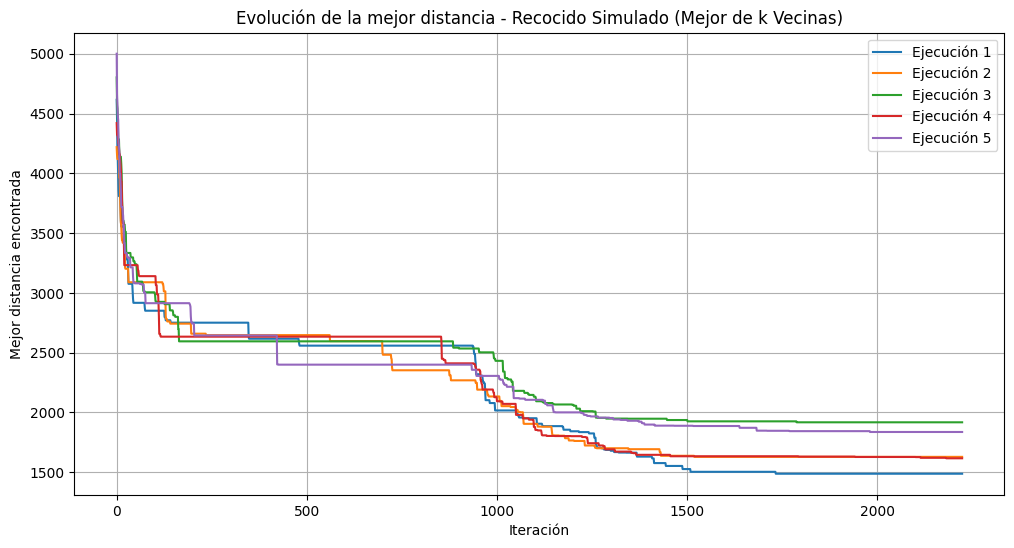

In [47]:
import time
import pandas as pd
import matplotlib.pyplot as plt

# Función que genera una vecina 2-opt aleatoria
def genera_vecina_aleatorio(solucion):
    i, j = sorted(random.sample(range(1, len(solucion)), 2))
    return (
        solucion[:i]
        + [solucion[j]]
        + solucion[i+1:j]
        + [solucion[i]]
        + solucion[j+1:]
    )

# Nuevo generador de la mejor de k vecinas aleatorias
def genera_mejor_de_k_vecinas(solucion, problem, k=5):
    mejor_vecina = None
    mejor_distancia = float('inf')
    for _ in range(k):
        vecina = genera_vecina_aleatorio(solucion)
        distancia = distancia_total(vecina, problem)
        if distancia < mejor_distancia:
            mejor_vecina = vecina
            mejor_distancia = distancia
    return mejor_vecina

# Probabilidad de aceptar soluciones peores
def probabilidad(T, d):
    return random.random() < math.exp(-d / T)

# Función de enfriamiento
def bajar_temperatura(T, factor):
    return T * factor

# Recocido Simulado con mejor de k vecinas
def recocido_simulado_best_k(problem, T_inicial, cooling_factor, k_vecinas=5):
    """
    Recocido Simulado con:
    - Generación de la mejor de k vecinas aleatorias
    - Registro de convergencia
    - Medición de tiempo de ejecución

    Devuelve:
    - mejor_solucion
    - historico_mejores
    - tiempo total
    """
    Nodos = list(problem.get_nodes())

    solucion_referencia = crear_solucion(Nodos)
    distancia_referencia = distancia_total(solucion_referencia, problem)

    mejor_solucion = solucion_referencia.copy()
    mejor_distancia = distancia_referencia
    historico_mejores = [mejor_distancia]

    temperatura = T_inicial
    iteracion = 0

    tiempo_inicio = time.time()

    while temperatura > 0.0001:
        iteracion += 1

        vecina = genera_mejor_de_k_vecinas(solucion_referencia, problem, k=k_vecinas)
        distancia_vecina = distancia_total(vecina, problem)

        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina.copy()
            mejor_distancia = distancia_vecina

        historico_mejores.append(mejor_distancia)

        if (
            distancia_vecina < distancia_referencia
            or probabilidad(temperatura, abs(distancia_referencia - distancia_vecina))
        ):
            solucion_referencia = vecina
            distancia_referencia = distancia_vecina

        temperatura = bajar_temperatura(temperatura, cooling_factor)

    tiempo_fin = time.time()

    return mejor_solucion, historico_mejores, (tiempo_fin - tiempo_inicio)

# Ejecución de múltiples experimentos
num_ejecuciones = 5
T_inicial = 500000
cooling_factor = 0.99
k_vecinas = 5

resultados_sa_k = []

plt.figure(figsize=(12,6))

for i in range(num_ejecuciones):
    print(f"\nEjecución {i+1} de {num_ejecuciones}")
    solucion, historico, tiempo = recocido_simulado_best_k(
        problem,
        T_inicial=T_inicial,
        cooling_factor=cooling_factor,
        k_vecinas=k_vecinas
    )

    distancia_final = historico[-1]
    iteraciones = len(historico)

    print(f"Distancia final: {distancia_final}")
    print(f"Iteraciones: {iteraciones}")
    print(f"Tiempo: {tiempo:.2f} s")

    resultados_sa_k.append({
        "Ejecución": i+1,
        "Distancia": distancia_final,
        "Iteraciones": iteraciones,
        "Tiempo (s)": round(tiempo,2)
    })

    # Graficar evolución de esta ejecución
    plt.plot(historico, label=f'Ejecución {i+1}')

# Mostrar tabla de resultados
df_resultados_sa_k = pd.DataFrame(resultados_sa_k)
display(df_resultados_sa_k)

print("\nResumen estadístico:")
display(df_resultados_sa_k.describe())

# Personalizar y mostrar gráfica
plt.title("Evolución de la mejor distancia - Recocido Simulado (Mejor de k Vecinas)")
plt.xlabel("Iteración")
plt.ylabel("Mejor distancia encontrada")
plt.legend()
plt.grid(True)
plt.show()


## Análisis y conclusiones de Recocido Simulado Mejorado (Mejor de k Vecinas)

### Descripción

Esta versión mejorada del Recocido Simulado reemplaza la generación de una única vecina aleatoria por un enfoque más estructurado:

La generación de la mejor de k vecinas aleatorias en cada iteración (k=5) permite reducir la aleatoriedad excesiva, mantener diversidad en la exploración y, al mismo tiempo, incrementar la calidad media de las soluciones encontradas.

Gracias a esta estrategia, el algoritmo logra un equilibrio más eficaz entre exploración global y explotación local.

**Comparación con otros métodos**

| Método                         | Mejor Distancia |
|--------------------------------|-----------------|
| Búsqueda Aleatoria             | ~3,583          |
| Búsqueda Local Básica          | ~1,623          |
| Búsqueda Local Avanzada        | **1,336**       |
| Recocido Simulado (simple)     | ~1,851          |
| Recocido Simulado Mejorado (k) | **1,488**       |

**Interpretación**

- El Recocido Simulado Mejorado ha superado la versión básica de Recocido Simulado.
- Las soluciones obtenidas se acercan mucho a la Búsqueda Local Avanzada, con menos variabilidad que el recocido simple y mayor robustez.
- El coste computacional es algo mayor que el recocido simple, pero muy inferior a ejecutar múltiples reinicios completos.

### Fortalezas

- La elección de la mejor de k vecinas evita movimientos muy desfavorables.
- Menor variabilidad en las soluciones finales y, por tanto,mas estabilidad
- Capacidad de escapar de mínimos locales sin depender de reinicios.


### Limitaciones

- Tiempo de ejecución mayor que el recocido simple (por generación y evaluación de k vecinas).
- La calidad sigue dependiendo de los parámetros (temperatura inicial, factor de enfriamiento y k).
- No garantiza alcanzar el óptimo global.

### Complejidad temporal

La complejidad temporal por iteración es O(k × n), ya que se generan k vecinas y se evalúa cada una.

### Complejidad espacial

La complejidad espacial sigue siendo O(n), ya que únicamente se almacena la solución actual, la mejor solución encontrada, y Variables auxiliares de evaluación.

### Completitud

Es completo porque siempre termina y devuelve la mejor solución hallada al finalizar el proceso de enfriamiento. No obstante, no asegura encontrar el óptimo global.

### Optimalidad

No es óptimo. Aunque supera de manera consistente al Recocido Simulado simple, no logra alcanzar la calidad máxima obtenida por la Búsqueda Local Avanzada con multiarranque y entornos variables.

### Reflexiones sobre estabilidad y aleatoriedad

- El uso de la mejor de k vecinas reduce la variabilidad de resultados respecto a la versión básica.
- Las curvas de convergencia muestran descensos progresivos y menos estancamientos tempranos.
- Este comportamiento confirma que una exploración semi-dirigida puede mejorar  el rendimiento.


### Propuestas de mejora

- Incrementar k a valores mayores (10 o 15) para ganar profundidad exploratoria.
- Introducir un esquema de enfriamiento adaptativo basado en la tasa de mejora.
- Combinar este enfoque con reinicios automáticos si no hay mejoras tras un número fijo de iteraciones.

### Conclusiones

El Recocido Simulado Mejorado con generación de la mejor de k vecinas ha demostrado ser un enfoque muy eficaz que se sitúa  por encima de la versión básica y cerca del rendimiento de las búsquedas locales avanzadas. Su capacidad para equilibrar la exploración y la explotación lo convierte en una heurística valiosa y flexible para problemas combinatorios como el TSP, con un tiempo de ejecución reducido y una robustez notable frente a la variabilidad de soluciones.
